# Executive Summary

A Multi-Class Logistic Regression model was developed using Machine Learning to evaluate three different classifications (Selosa, Versicolor and Virginica). This model was created using Python (Pandas, Scikit-Learn and Seaborn) to structure, analyze and visualize the data set.

## Model Performance

The accuracy of the model for the testing set was calculated at 93.3%. This model was then ptimized by using K-nearest neighbors and the new calculated accuracy became 96.7%.

In [1]:
#Imports for Data and Plots
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline

In [2]:
from sklearn import linear_model
from sklearn.datasets import load_iris

In [3]:
#Loading the Data that will be analyzed
iris=load_iris()

In [4]:
#Setting up features
x=iris.data
y=iris.target

In [6]:
#Converting data set into Pandas for the purpose of visualiztion on Seaborn
iris_data=DataFrame(x,columns=['Sepal Length','Sepal Width','Petal Length','Petal Width'])

In [8]:
iris_target=DataFrame(y,columns=['Species'])

In [9]:
#Changing values from iris_target to actual species names
def flower(num):
    if num==0:
        return 'Setosa'
    elif num==1:
        return 'Versicolor'
    else:
        return 'Virginica'

In [10]:
iris_target['Species']=iris_target['Species'].apply(flower)

In [13]:
iris=pd.concat([iris_data,iris_target],axis=1)

In [14]:
iris.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


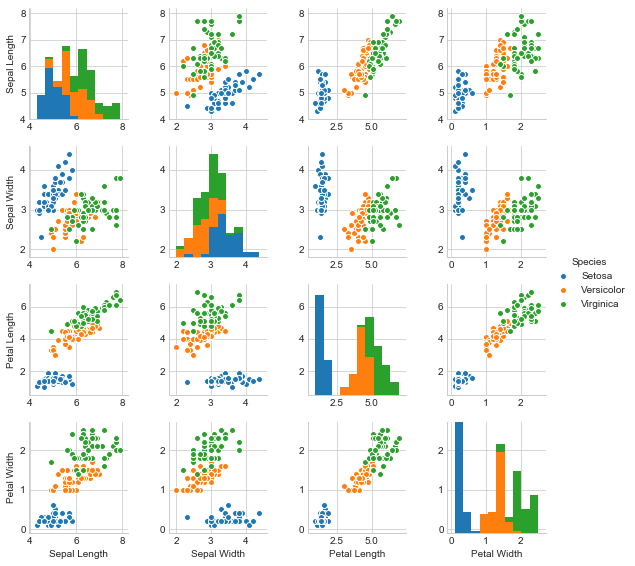

In [15]:
#Visualizing data set 
sns.pairplot(iris,hue='Species',size=2)

In [16]:
#Importing from SciKit-Learn the Logistic Regression function and the Train/Test Splitting function
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [18]:
#Creating a Logistic Regression object and inputing splitting conditions for our train and test sets
logreg=LogisticRegression()
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.4,random_state=3)

In [19]:
#The logistic regression object is being fitted into the training sets
logreg.fit(xtrain,ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [20]:
#Testing the accuracy of the model 
from sklearn import metrics

In [21]:
y_pred=logreg.predict(xtest)

In [22]:
#Comparing the models results with the actual values (y-test set)
print metrics.accuracy_score(ytest,y_pred)

0.933333333333


In [38]:
#Using K-nearest neighbors to optimize the logistic regression model
from sklearn.neighbors import KNeighborsClassifier

In [39]:
knn=KNeighborsClassifier(n_neighbors=13)

In [40]:
knn.fit(xtrain,ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=13, p=2,
           weights='uniform')

In [41]:
y_pred=knn.predict(xtest)

In [42]:
#Comparing the models results with the actual values (y-test set)
print metrics.accuracy_score(ytest,y_pred)

0.966666666667


In [43]:
#Verifying the selected knn. Ranges of k-values from 0-19 were evaluated
k_range=range(1,21)
accuracy=[]

In [44]:
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(xtrain,ytrain)
    y_pred=knn.predict(xtest)
    accuracy.append(metrics.accuracy_score(ytest,y_pred))

In [52]:
#In this range our selected k-value did give us the highest accuracy of 96.7%
DataFrame(accuracy,columns=['Accuracy %'])

,Accuracy %
0,0.966667
1,0.966667
2,0.950000
3,0.950000
4,0.933333
5,0.950000
6,0.950000
7,0.950000
8,0.950000
9,0.933333
